Plan:


1. Read each CSV file
    - Save the station, start, end

2. Find overlapping events between stations, keep if 2 or more stations record the event
    - Put overlapping events together

3. Group  by how many different stations recorded the same event

4. Get Events
    - Write into folders based on how many stations recorded the same event, like:  2_stations/ 3_stations/ 4_stations/ 

5. CSV Headers
    - Write .csv like:   Stations - 1, 2, 3  Starttimes - 10:00, 10:01, 10:02   Endtimes - etc. 

# 1. Read CSV Files 

In [56]:
# Filenames
import os

class FilePath:
    def __init__(self, path, station):
        self.path = path
        self.station = station

    def __str__(self):
        return self.path
        
        
path = 'found-events/output/'
filenames = [FilePath(os.path.join(path, f'TZdataCES0{i}/catalog_detection.csv'), f"CES0{i}") for i in range(1, 10)]


In [57]:
import csv
import operator as op
from typing import List
from collections import namedtuple
from pprint import pprint
from functools import reduce

Event = namedtuple("Event", ['station', 'start', 'end'])


def get_events(filename, station_name):
    events = []
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)

        for row in reader:
            events.append(Event(station_name, start=row[4], end=row[3]))  # These row numbers depend on your CSV format

    return events

events: List[Event]     
events = reduce(op.add, [get_events(filename.path, filename.station) for filename in filenames])

print(f"Read {len(events)} events from {len(filenames)} stations")
pprint(events)

Read 17505 events from 9 stations
[Event(station='CES01', start='start_time', end='end_time'),
 Event(station='CES01', start='2016-08-01T00:01:06.000000Z', end='2016-08-01T00:01:16.000000Z'),
 Event(station='CES01', start='2016-08-01T00:01:17.000000Z', end='2016-08-01T00:01:27.000000Z'),
 Event(station='CES01', start='2016-08-01T00:04:24.000000Z', end='2016-08-01T00:04:34.000000Z'),
 Event(station='CES01', start='2016-08-01T00:04:35.000000Z', end='2016-08-01T00:04:45.000000Z'),
 Event(station='CES01', start='2016-08-01T00:04:46.000000Z', end='2016-08-01T00:04:56.000000Z'),
 Event(station='CES01', start='2016-08-01T00:04:57.000000Z', end='2016-08-01T00:05:07.000000Z'),
 Event(station='CES01', start='2016-08-01T00:05:30.000000Z', end='2016-08-01T00:05:40.000000Z'),
 Event(station='CES01', start='2016-08-01T00:06:03.000000Z', end='2016-08-01T00:06:13.000000Z'),
 Event(station='CES01', start='2016-08-01T00:06:14.000000Z', end='2016-08-01T00:06:24.000000Z'),
 Event(station='CES01', start='2

 Event(station='CES01', start='2016-08-01T06:12:10.000000Z', end='2016-08-01T06:12:20.000000Z'),
 Event(station='CES01', start='2016-08-01T06:13:38.000000Z', end='2016-08-01T06:13:48.000000Z'),
 Event(station='CES01', start='2016-08-01T06:13:49.000000Z', end='2016-08-01T06:13:59.000000Z'),
 Event(station='CES01', start='2016-08-01T06:14:22.000000Z', end='2016-08-01T06:14:32.000000Z'),
 Event(station='CES01', start='2016-08-01T06:15:50.000000Z', end='2016-08-01T06:16:00.000000Z'),
 Event(station='CES01', start='2016-08-01T06:16:01.000000Z', end='2016-08-01T06:16:11.000000Z'),
 Event(station='CES01', start='2016-08-01T06:16:12.000000Z', end='2016-08-01T06:16:22.000000Z'),
 Event(station='CES01', start='2016-08-01T06:16:23.000000Z', end='2016-08-01T06:16:33.000000Z'),
 Event(station='CES01', start='2016-08-01T06:16:56.000000Z', end='2016-08-01T06:17:06.000000Z'),
 Event(station='CES01', start='2016-08-01T06:17:29.000000Z', end='2016-08-01T06:17:39.000000Z'),
 Event(station='CES01', start=

 Event(station='CES02', start='2016-08-01T06:23:21.000000Z', end='2016-08-01T06:23:31.000000Z'),
 Event(station='CES02', start='2016-08-01T06:23:43.000000Z', end='2016-08-01T06:23:53.000000Z'),
 Event(station='CES02', start='2016-08-01T06:25:11.000000Z', end='2016-08-01T06:25:21.000000Z'),
 Event(station='CES02', start='2016-08-01T06:26:06.000000Z', end='2016-08-01T06:26:16.000000Z'),
 Event(station='CES02', start='2016-08-01T06:27:56.000000Z', end='2016-08-01T06:28:06.000000Z'),
 Event(station='CES02', start='2016-08-01T06:28:07.000000Z', end='2016-08-01T06:28:17.000000Z'),
 Event(station='CES02', start='2016-08-01T06:28:40.000000Z', end='2016-08-01T06:28:50.000000Z'),
 Event(station='CES02', start='2016-08-01T06:29:24.000000Z', end='2016-08-01T06:29:34.000000Z'),
 Event(station='CES02', start='2016-08-01T06:29:46.000000Z', end='2016-08-01T06:29:56.000000Z'),
 Event(station='CES02', start='2016-08-01T06:30:30.000000Z', end='2016-08-01T06:30:40.000000Z'),
 Event(station='CES02', start=

 Event(station='CES03', start='2016-08-01T06:11:59.000000Z', end='2016-08-01T06:12:09.000000Z'),
 Event(station='CES03', start='2016-08-01T06:12:32.000000Z', end='2016-08-01T06:12:42.000000Z'),
 Event(station='CES03', start='2016-08-01T06:13:16.000000Z', end='2016-08-01T06:13:26.000000Z'),
 Event(station='CES03', start='2016-08-01T06:13:27.000000Z', end='2016-08-01T06:13:37.000000Z'),
 Event(station='CES03', start='2016-08-01T06:13:38.000000Z', end='2016-08-01T06:13:48.000000Z'),
 Event(station='CES03', start='2016-08-01T06:13:49.000000Z', end='2016-08-01T06:13:59.000000Z'),
 Event(station='CES03', start='2016-08-01T06:14:00.000000Z', end='2016-08-01T06:14:10.000000Z'),
 Event(station='CES03', start='2016-08-01T06:14:11.000000Z', end='2016-08-01T06:14:21.000000Z'),
 Event(station='CES03', start='2016-08-01T06:14:33.000000Z', end='2016-08-01T06:14:43.000000Z'),
 Event(station='CES03', start='2016-08-01T06:14:55.000000Z', end='2016-08-01T06:15:05.000000Z'),
 Event(station='CES03', start=

 Event(station='CES04', start='2016-08-01T00:02:34.000000Z', end='2016-08-01T00:02:44.000000Z'),
 Event(station='CES04', start='2016-08-01T00:02:45.000000Z', end='2016-08-01T00:02:55.000000Z'),
 Event(station='CES04', start='2016-08-01T00:02:56.000000Z', end='2016-08-01T00:03:06.000000Z'),
 Event(station='CES04', start='2016-08-01T00:03:07.000000Z', end='2016-08-01T00:03:17.000000Z'),
 Event(station='CES04', start='2016-08-01T00:03:18.000000Z', end='2016-08-01T00:03:28.000000Z'),
 Event(station='CES04', start='2016-08-01T00:03:29.000000Z', end='2016-08-01T00:03:39.000000Z'),
 Event(station='CES04', start='2016-08-01T00:03:40.000000Z', end='2016-08-01T00:03:50.000000Z'),
 Event(station='CES04', start='2016-08-01T00:03:51.000000Z', end='2016-08-01T00:04:01.000000Z'),
 Event(station='CES04', start='2016-08-01T00:04:13.000000Z', end='2016-08-01T00:04:23.000000Z'),
 Event(station='CES04', start='2016-08-01T00:04:24.000000Z', end='2016-08-01T00:04:34.000000Z'),
 Event(station='CES04', start=

 Event(station='CES05', start='2016-08-01T07:12:51.000000Z', end='2016-08-01T07:13:01.000000Z'),
 Event(station='CES05', start='2016-08-01T07:13:35.000000Z', end='2016-08-01T07:13:45.000000Z'),
 Event(station='CES05', start='2016-08-01T07:13:57.000000Z', end='2016-08-01T07:14:07.000000Z'),
 Event(station='CES05', start='2016-08-01T07:14:30.000000Z', end='2016-08-01T07:14:40.000000Z'),
 Event(station='CES05', start='2016-08-01T07:14:52.000000Z', end='2016-08-01T07:15:02.000000Z'),
 Event(station='CES05', start='2016-08-01T07:15:03.000000Z', end='2016-08-01T07:15:13.000000Z'),
 Event(station='CES05', start='2016-08-01T07:15:14.000000Z', end='2016-08-01T07:15:24.000000Z'),
 Event(station='CES05', start='2016-08-01T07:16:20.000000Z', end='2016-08-01T07:16:30.000000Z'),
 Event(station='CES05', start='2016-08-01T07:16:31.000000Z', end='2016-08-01T07:16:41.000000Z'),
 Event(station='CES05', start='2016-08-01T07:17:04.000000Z', end='2016-08-01T07:17:14.000000Z'),
 Event(station='CES05', start=

 Event(station='CES06', start='2016-08-01T05:14:36.000000Z', end='2016-08-01T05:14:46.000000Z'),
 Event(station='CES06', start='2016-08-01T05:15:31.000000Z', end='2016-08-01T05:15:41.000000Z'),
 Event(station='CES06', start='2016-08-01T05:16:04.000000Z', end='2016-08-01T05:16:14.000000Z'),
 Event(station='CES06', start='2016-08-01T05:16:15.000000Z', end='2016-08-01T05:16:25.000000Z'),
 Event(station='CES06', start='2016-08-01T05:16:59.000000Z', end='2016-08-01T05:17:09.000000Z'),
 Event(station='CES06', start='2016-08-01T05:18:49.000000Z', end='2016-08-01T05:18:59.000000Z'),
 Event(station='CES06', start='2016-08-01T05:19:22.000000Z', end='2016-08-01T05:19:32.000000Z'),
 Event(station='CES06', start='2016-08-01T05:19:44.000000Z', end='2016-08-01T05:19:54.000000Z'),
 Event(station='CES06', start='2016-08-01T05:19:55.000000Z', end='2016-08-01T05:20:05.000000Z'),
 Event(station='CES06', start='2016-08-01T05:20:06.000000Z', end='2016-08-01T05:20:16.000000Z'),
 Event(station='CES06', start=

 Event(station='CES07', start='2016-08-01T06:33:48.000000Z', end='2016-08-01T06:33:58.000000Z'),
 Event(station='CES07', start='2016-08-01T06:34:32.000000Z', end='2016-08-01T06:34:42.000000Z'),
 Event(station='CES07', start='2016-08-01T06:35:05.000000Z', end='2016-08-01T06:35:15.000000Z'),
 Event(station='CES07', start='2016-08-01T06:35:16.000000Z', end='2016-08-01T06:35:26.000000Z'),
 Event(station='CES07', start='2016-08-01T06:35:27.000000Z', end='2016-08-01T06:35:37.000000Z'),
 Event(station='CES07', start='2016-08-01T06:35:38.000000Z', end='2016-08-01T06:35:48.000000Z'),
 Event(station='CES07', start='2016-08-01T06:36:00.000000Z', end='2016-08-01T06:36:10.000000Z'),
 Event(station='CES07', start='2016-08-01T06:36:22.000000Z', end='2016-08-01T06:36:32.000000Z'),
 Event(station='CES07', start='2016-08-01T06:36:44.000000Z', end='2016-08-01T06:36:54.000000Z'),
 Event(station='CES07', start='2016-08-01T06:36:55.000000Z', end='2016-08-01T06:37:05.000000Z'),
 Event(station='CES07', start=

 Event(station='CES08', start='2016-08-01T01:30:45.000000Z', end='2016-08-01T01:30:55.000000Z'),
 Event(station='CES08', start='2016-08-01T01:31:29.000000Z', end='2016-08-01T01:31:39.000000Z'),
 Event(station='CES08', start='2016-08-01T01:32:02.000000Z', end='2016-08-01T01:32:12.000000Z'),
 Event(station='CES08', start='2016-08-01T01:32:46.000000Z', end='2016-08-01T01:32:56.000000Z'),
 Event(station='CES08', start='2016-08-01T01:33:08.000000Z', end='2016-08-01T01:33:18.000000Z'),
 Event(station='CES08', start='2016-08-01T01:33:30.000000Z', end='2016-08-01T01:33:40.000000Z'),
 Event(station='CES08', start='2016-08-01T01:33:52.000000Z', end='2016-08-01T01:34:02.000000Z'),
 Event(station='CES08', start='2016-08-01T01:34:14.000000Z', end='2016-08-01T01:34:24.000000Z'),
 Event(station='CES08', start='2016-08-01T01:34:25.000000Z', end='2016-08-01T01:34:35.000000Z'),
 Event(station='CES08', start='2016-08-01T01:34:36.000000Z', end='2016-08-01T01:34:46.000000Z'),
 Event(station='CES08', start=

 Event(station='CES09', start='2016-08-01T01:04:43.000000Z', end='2016-08-01T01:04:53.000000Z'),
 Event(station='CES09', start='2016-08-01T01:05:16.000000Z', end='2016-08-01T01:05:26.000000Z'),
 Event(station='CES09', start='2016-08-01T01:05:27.000000Z', end='2016-08-01T01:05:37.000000Z'),
 Event(station='CES09', start='2016-08-01T01:05:38.000000Z', end='2016-08-01T01:05:48.000000Z'),
 Event(station='CES09', start='2016-08-01T01:05:49.000000Z', end='2016-08-01T01:05:59.000000Z'),
 Event(station='CES09', start='2016-08-01T01:06:22.000000Z', end='2016-08-01T01:06:32.000000Z'),
 Event(station='CES09', start='2016-08-01T01:06:44.000000Z', end='2016-08-01T01:06:54.000000Z'),
 Event(station='CES09', start='2016-08-01T01:07:06.000000Z', end='2016-08-01T01:07:16.000000Z'),
 Event(station='CES09', start='2016-08-01T01:07:17.000000Z', end='2016-08-01T01:07:27.000000Z'),
 Event(station='CES09', start='2016-08-01T01:07:50.000000Z', end='2016-08-01T01:08:00.000000Z'),
 Event(station='CES09', start=

 Event(station='CES09', start='2016-08-01T14:31:23.000000Z', end='2016-08-01T14:31:33.000000Z'),
 Event(station='CES09', start='2016-08-01T14:31:56.000000Z', end='2016-08-01T14:32:06.000000Z'),
 Event(station='CES09', start='2016-08-01T14:32:07.000000Z', end='2016-08-01T14:32:17.000000Z'),
 Event(station='CES09', start='2016-08-01T14:33:24.000000Z', end='2016-08-01T14:33:34.000000Z'),
 Event(station='CES09', start='2016-08-01T14:33:35.000000Z', end='2016-08-01T14:33:45.000000Z'),
 Event(station='CES09', start='2016-08-01T14:33:46.000000Z', end='2016-08-01T14:33:56.000000Z'),
 Event(station='CES09', start='2016-08-01T14:35:25.000000Z', end='2016-08-01T14:35:35.000000Z'),
 Event(station='CES09', start='2016-08-01T14:36:42.000000Z', end='2016-08-01T14:36:52.000000Z'),
 Event(station='CES09', start='2016-08-01T14:36:53.000000Z', end='2016-08-01T14:37:03.000000Z'),
 Event(station='CES09', start='2016-08-01T14:37:04.000000Z', end='2016-08-01T14:37:14.000000Z'),
 Event(station='CES09', start=

# 2. Find Overlapping Events Between Stations 

In [58]:
from pprint import pprint
from collections import defaultdict

sorted_events = sorted(events, key = lambda event: event.start)  # Sort by start time


event_buckets = defaultdict(list)
for event in sorted_events:
    event_buckets[event.start].append(event)

        
# Overlapping_events: dict(key: number, value: list[ list[Event] ])
overlapping_events = defaultdict(list) 
for starttime, event_list in event_buckets.items():
    overlapping_events[len(event_list)].append(event_list)
    
    
for key, evnts in sorted(overlapping_events.items()):
    print(f"{key} overlapping stations: {len(evnts)} events")



1 overlapping stations: 327 events
2 overlapping stations: 892 events
3 overlapping stations: 1306 events
4 overlapping stations: 1258 events
5 overlapping stations: 773 events
6 overlapping stations: 326 events
7 overlapping stations: 66 events
8 overlapping stations: 19 events
9 overlapping stations: 1 events


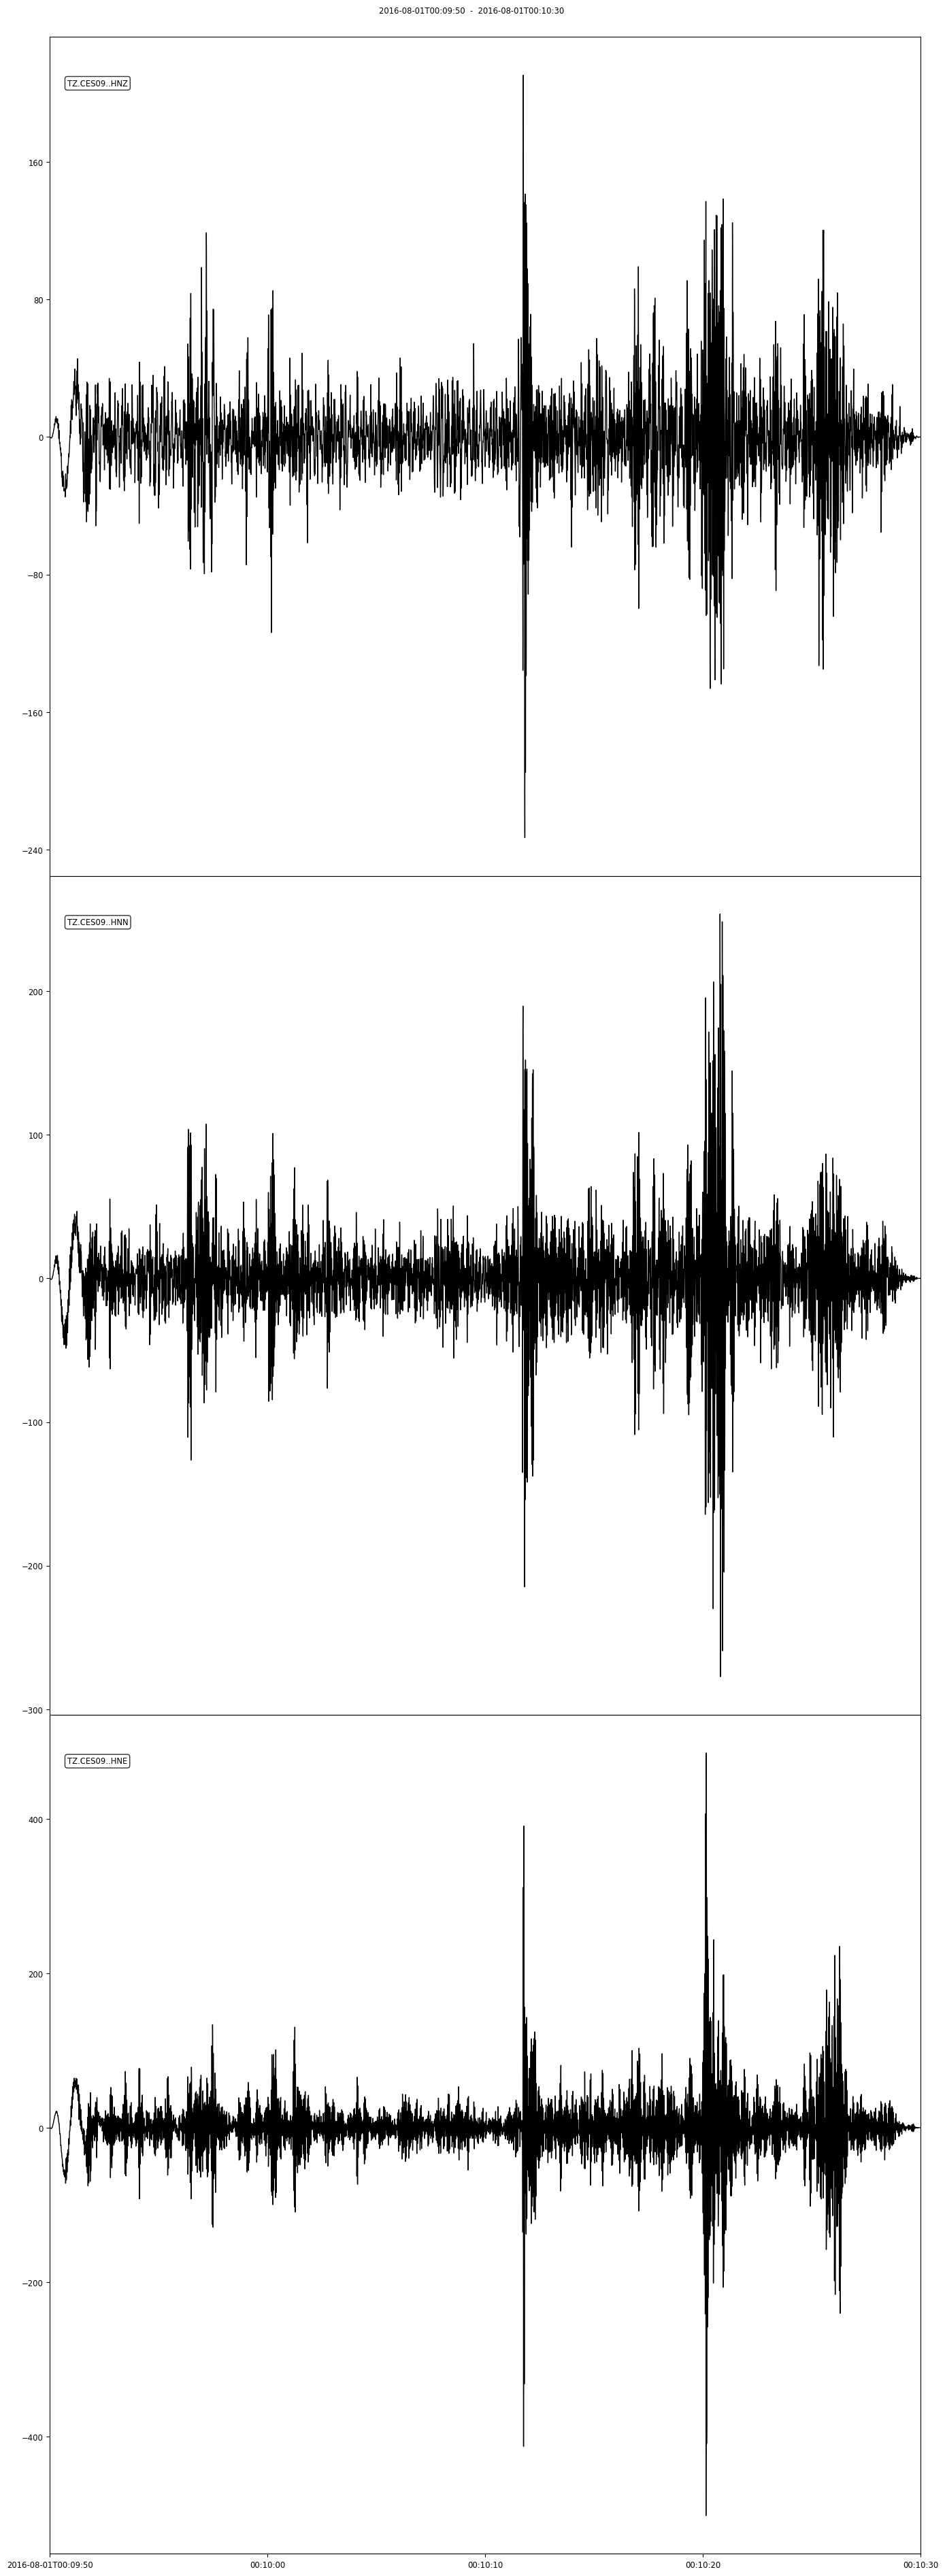

--------------------Next Event--------------------


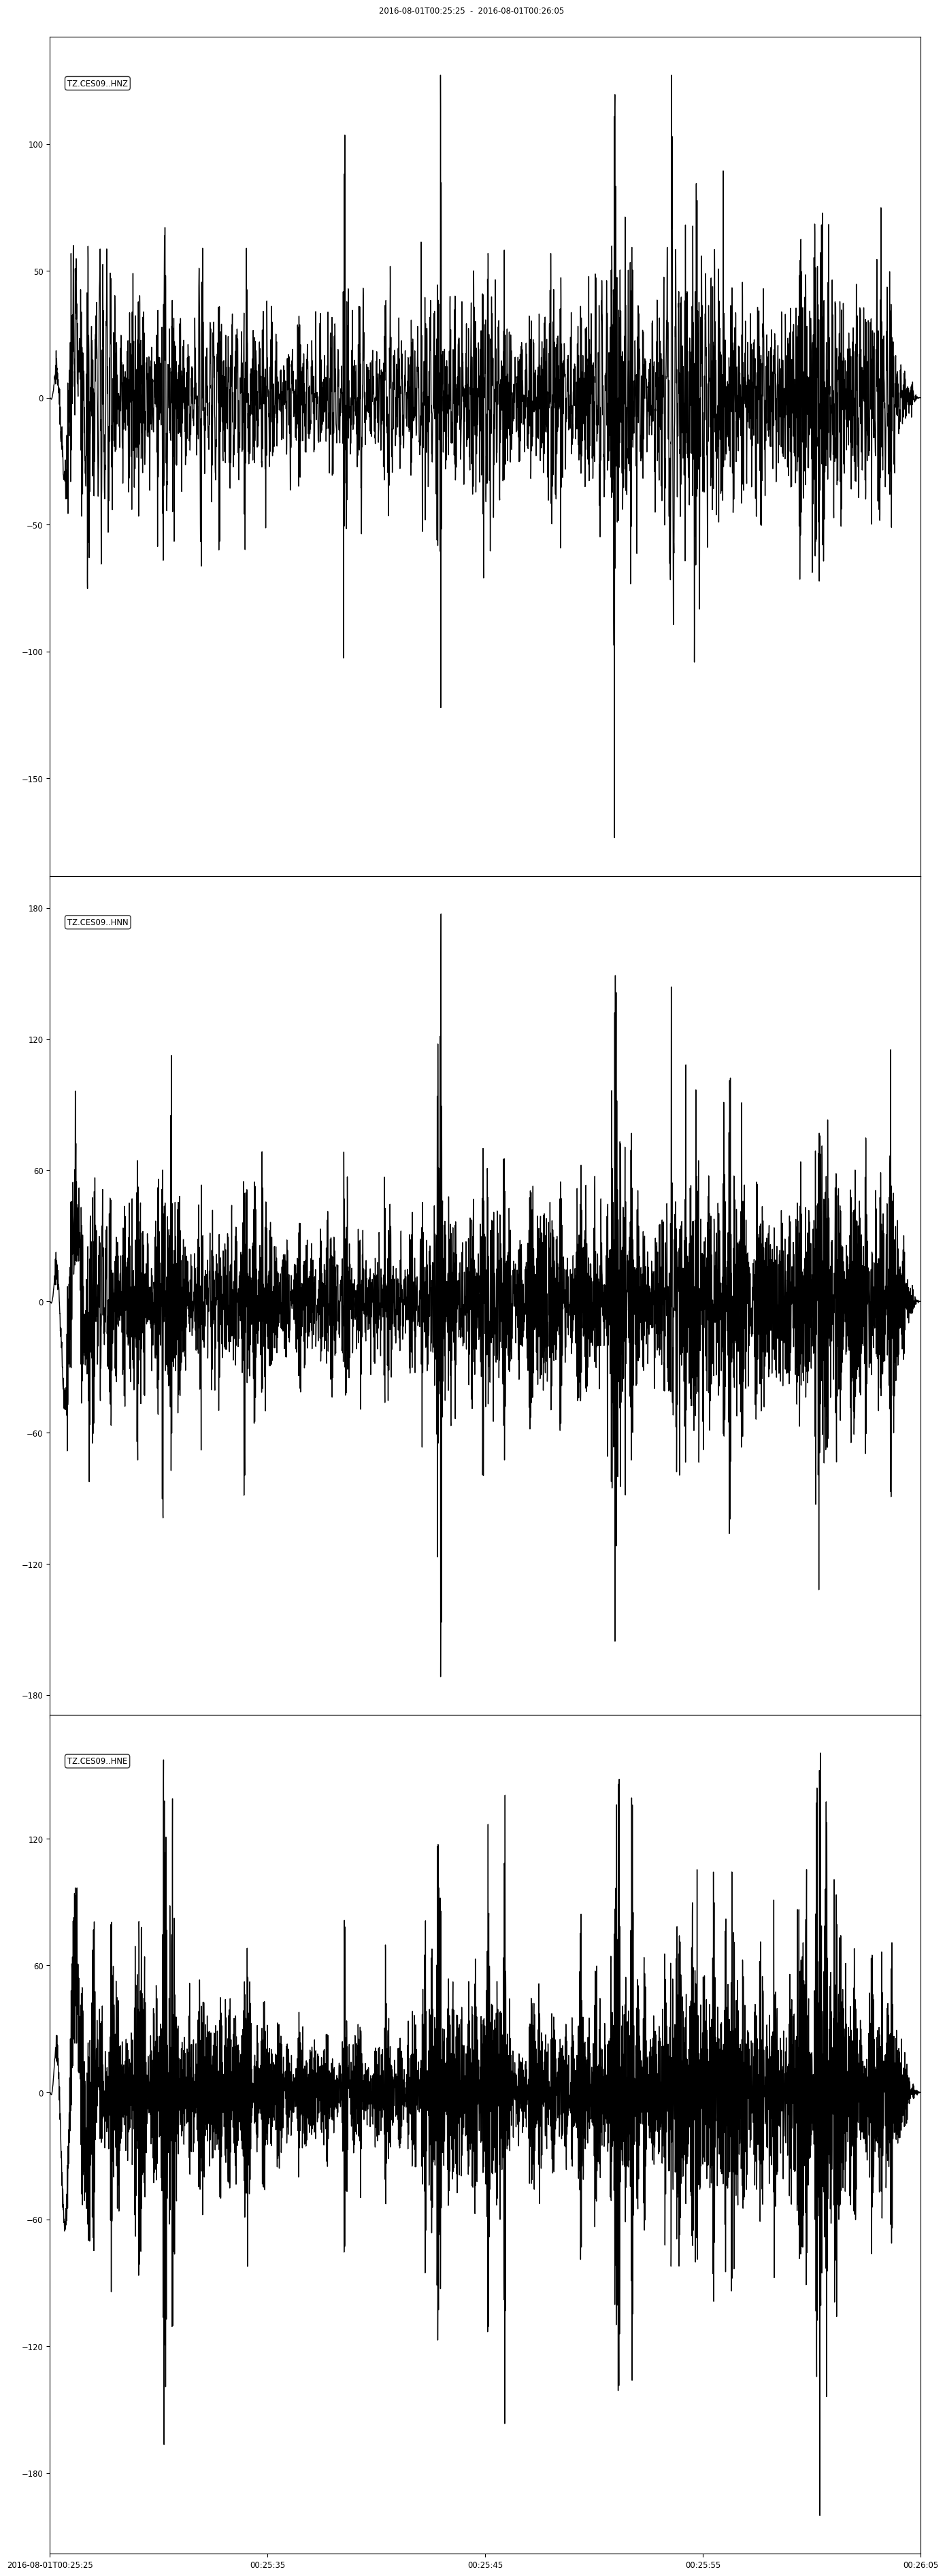

--------------------Next Event--------------------


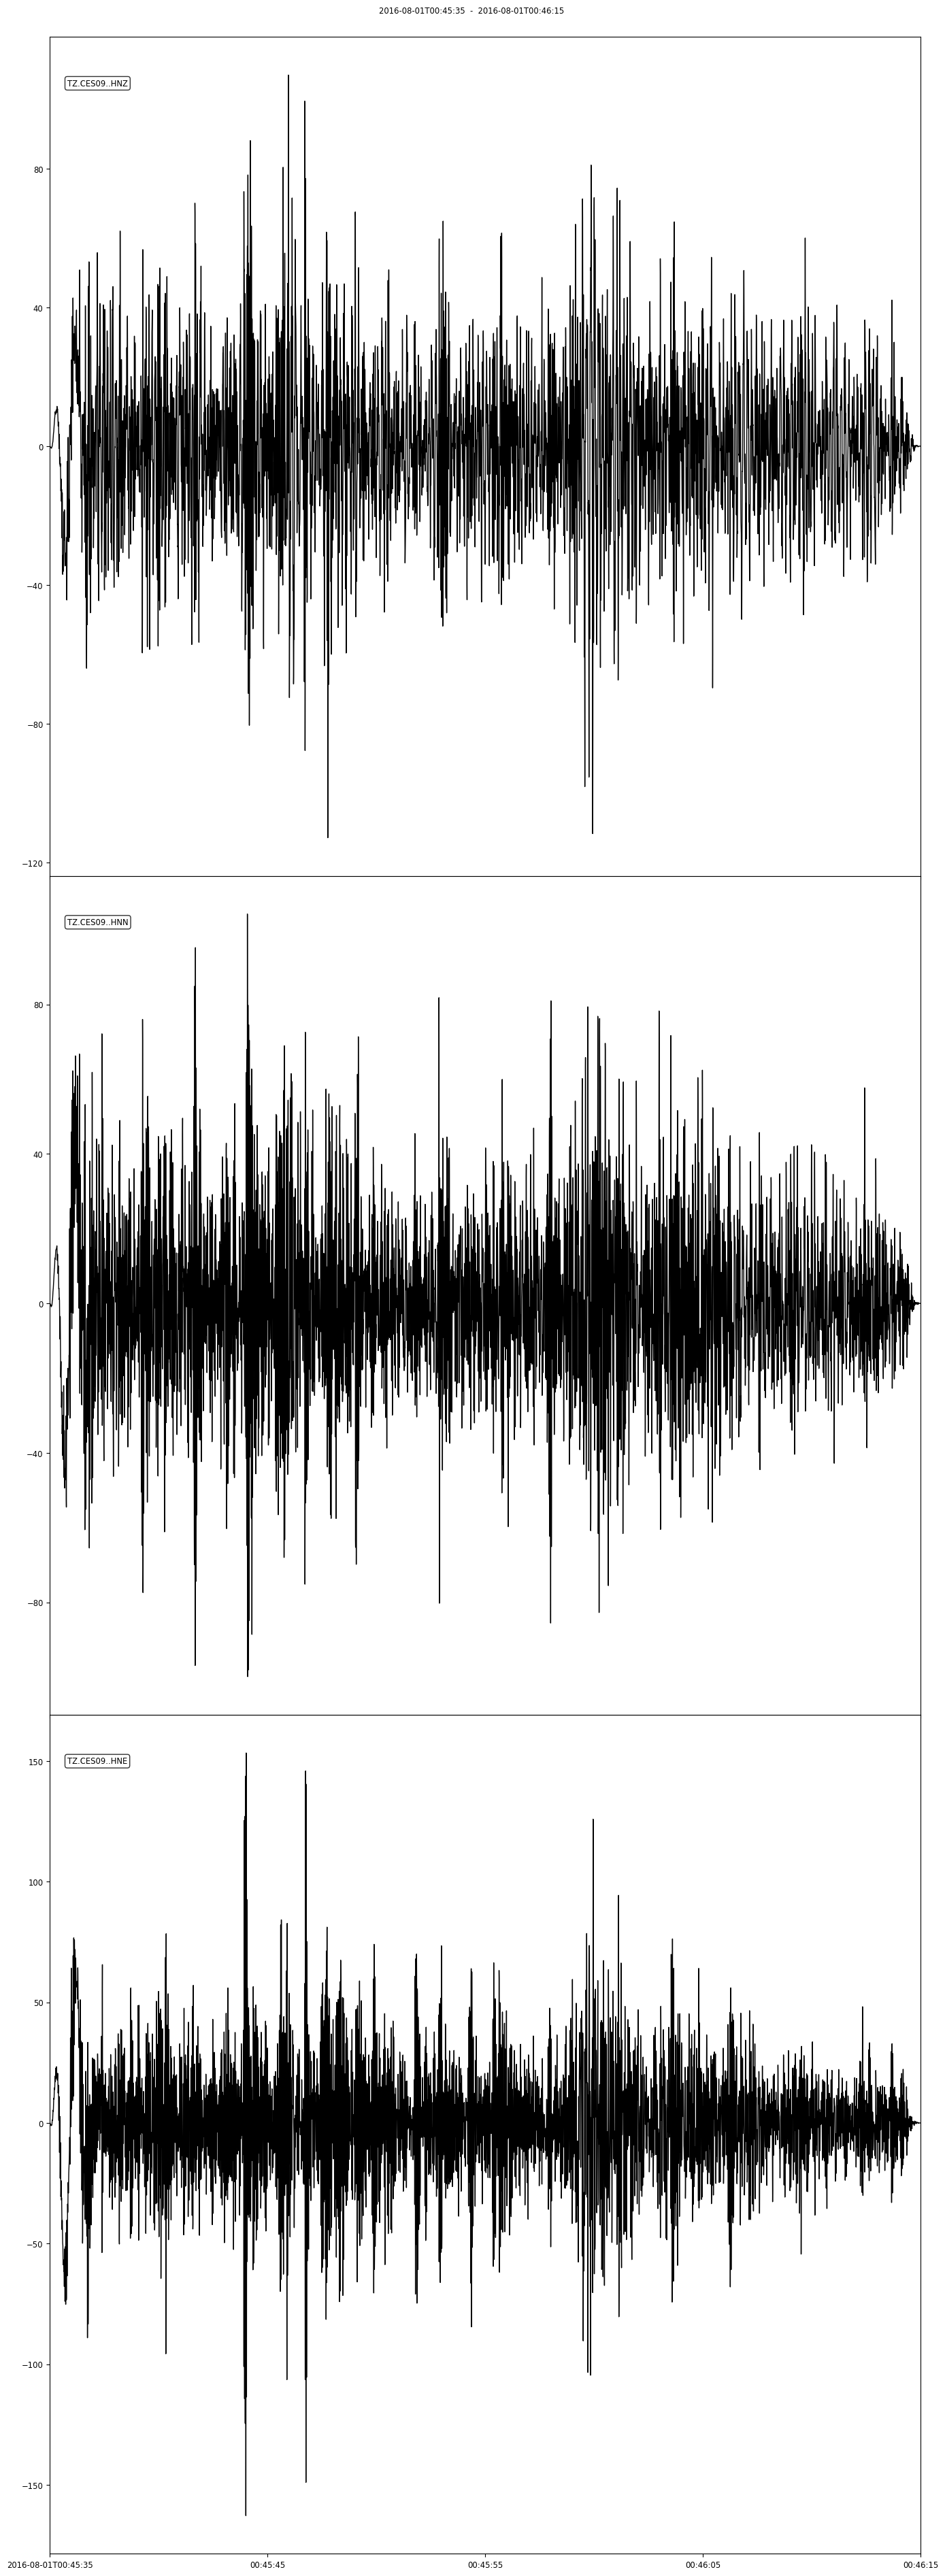

--------------------Next Event--------------------


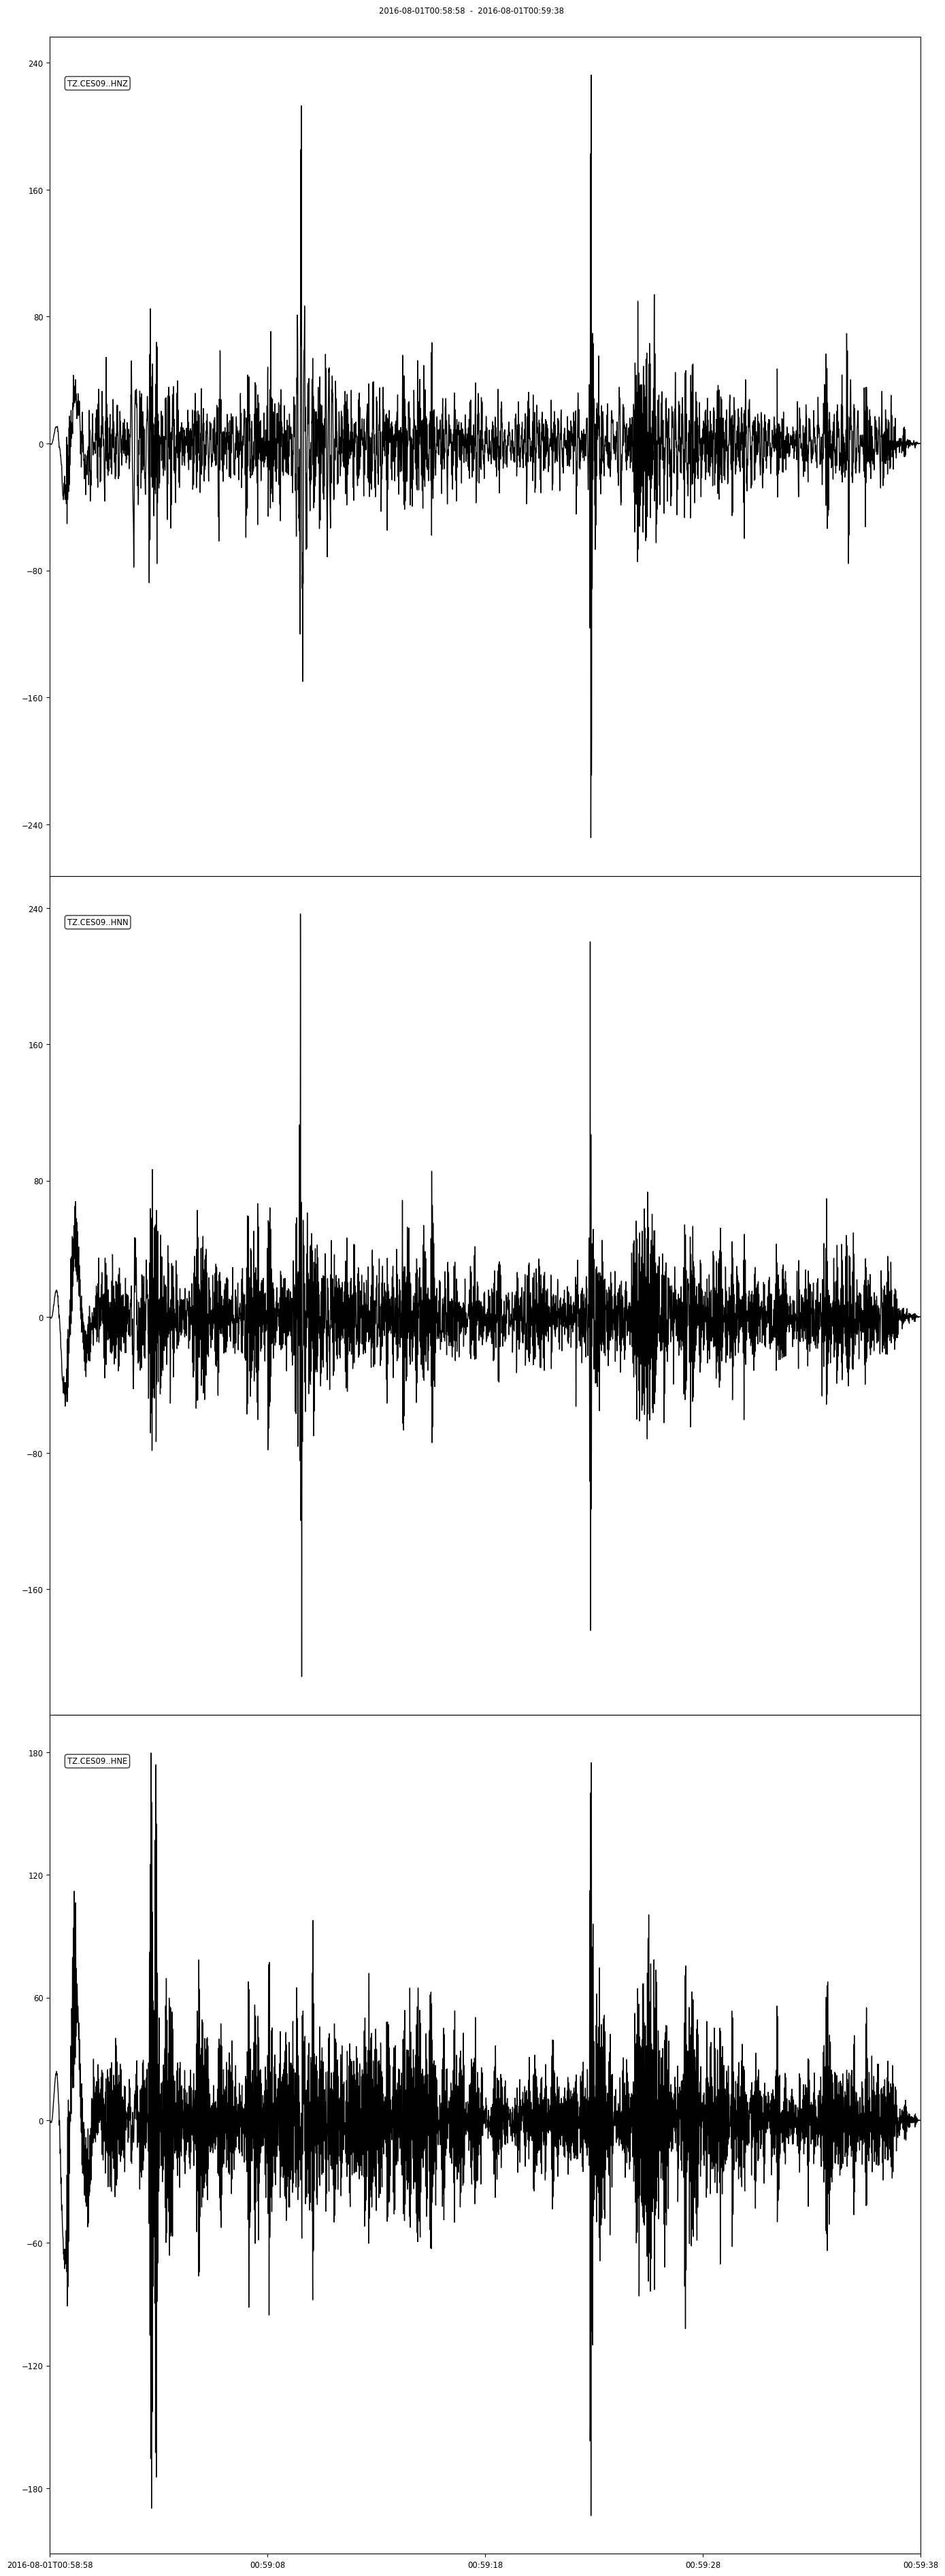

--------------------Next Event--------------------


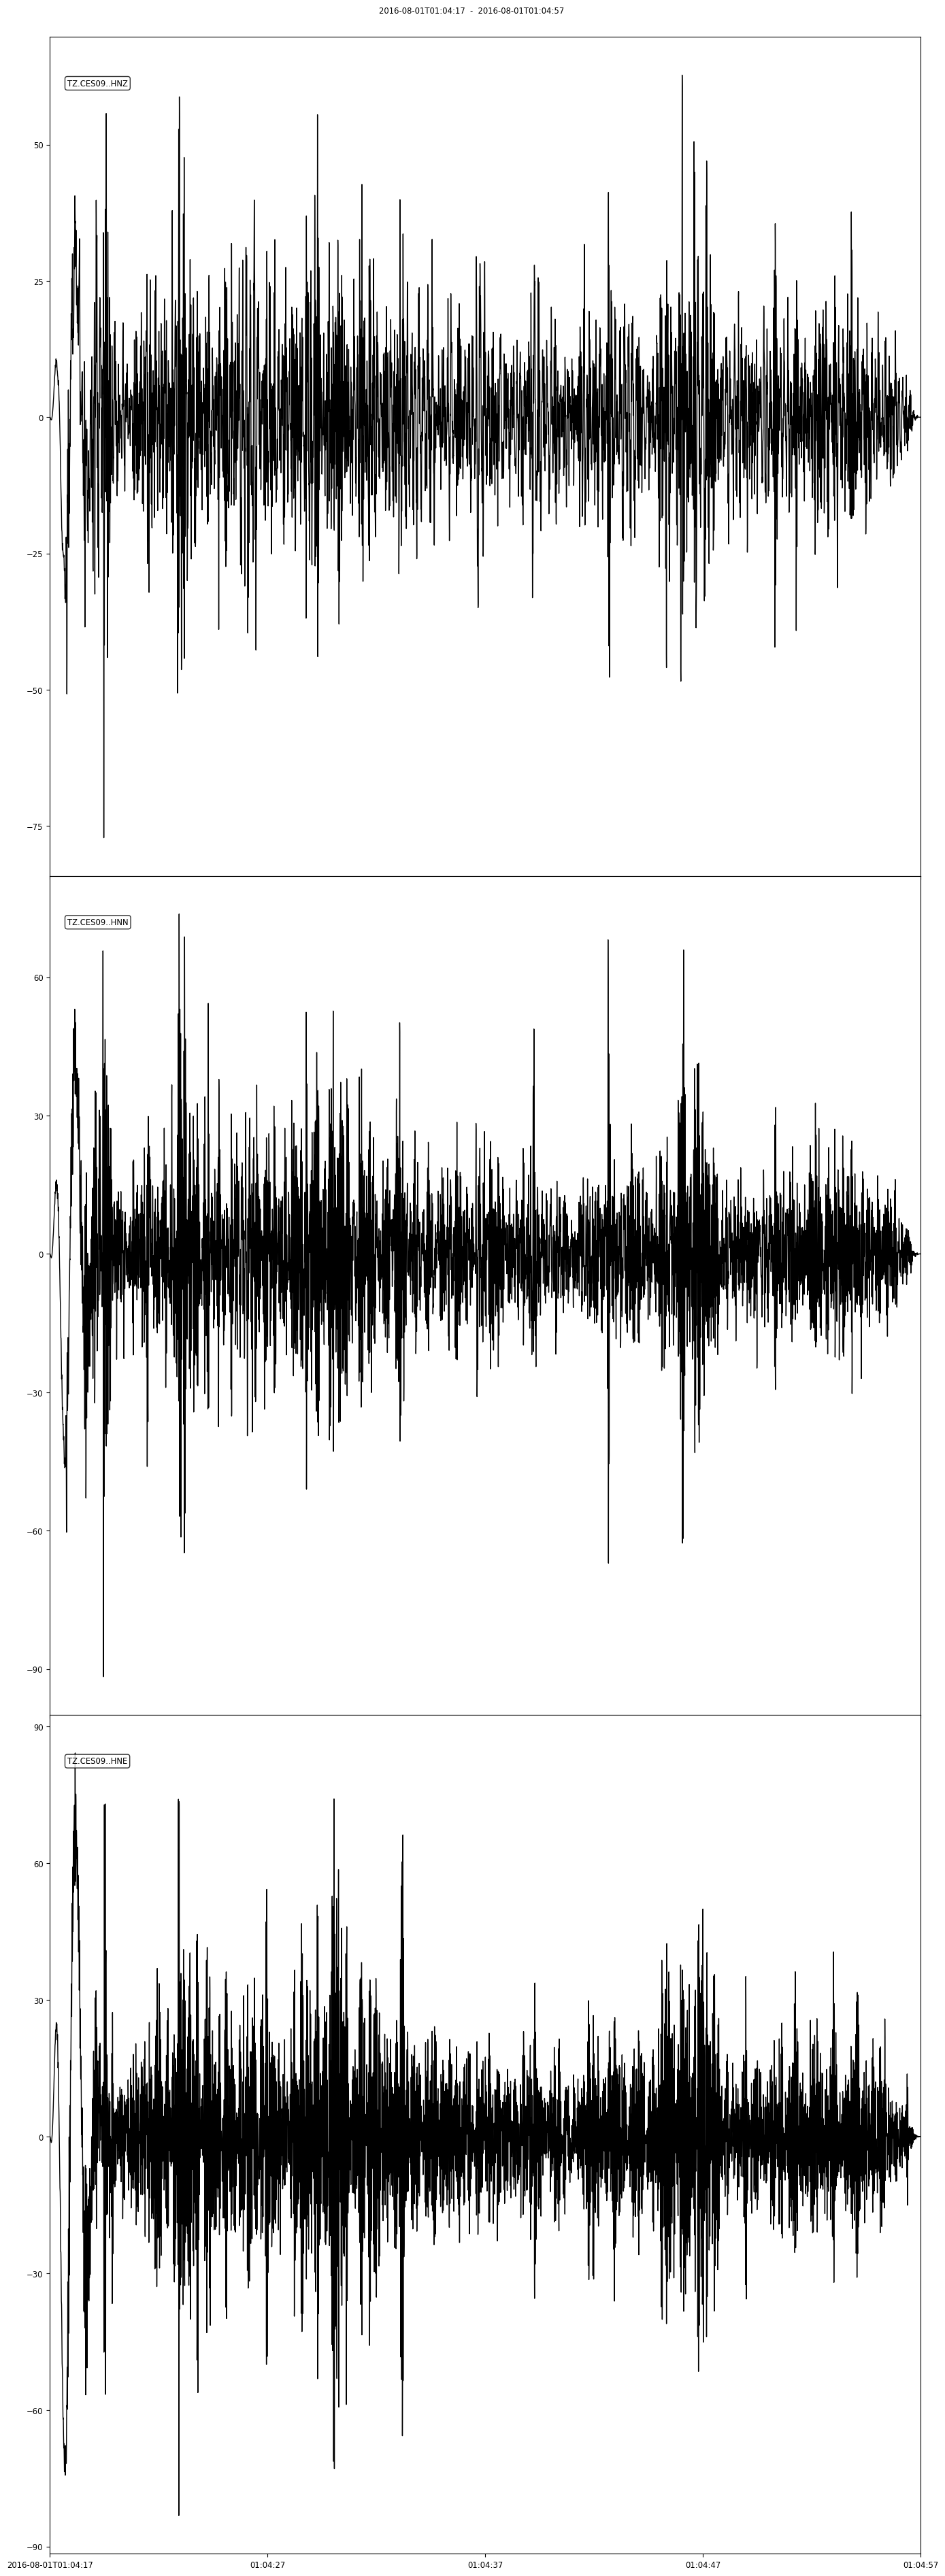

--------------------Next Event--------------------


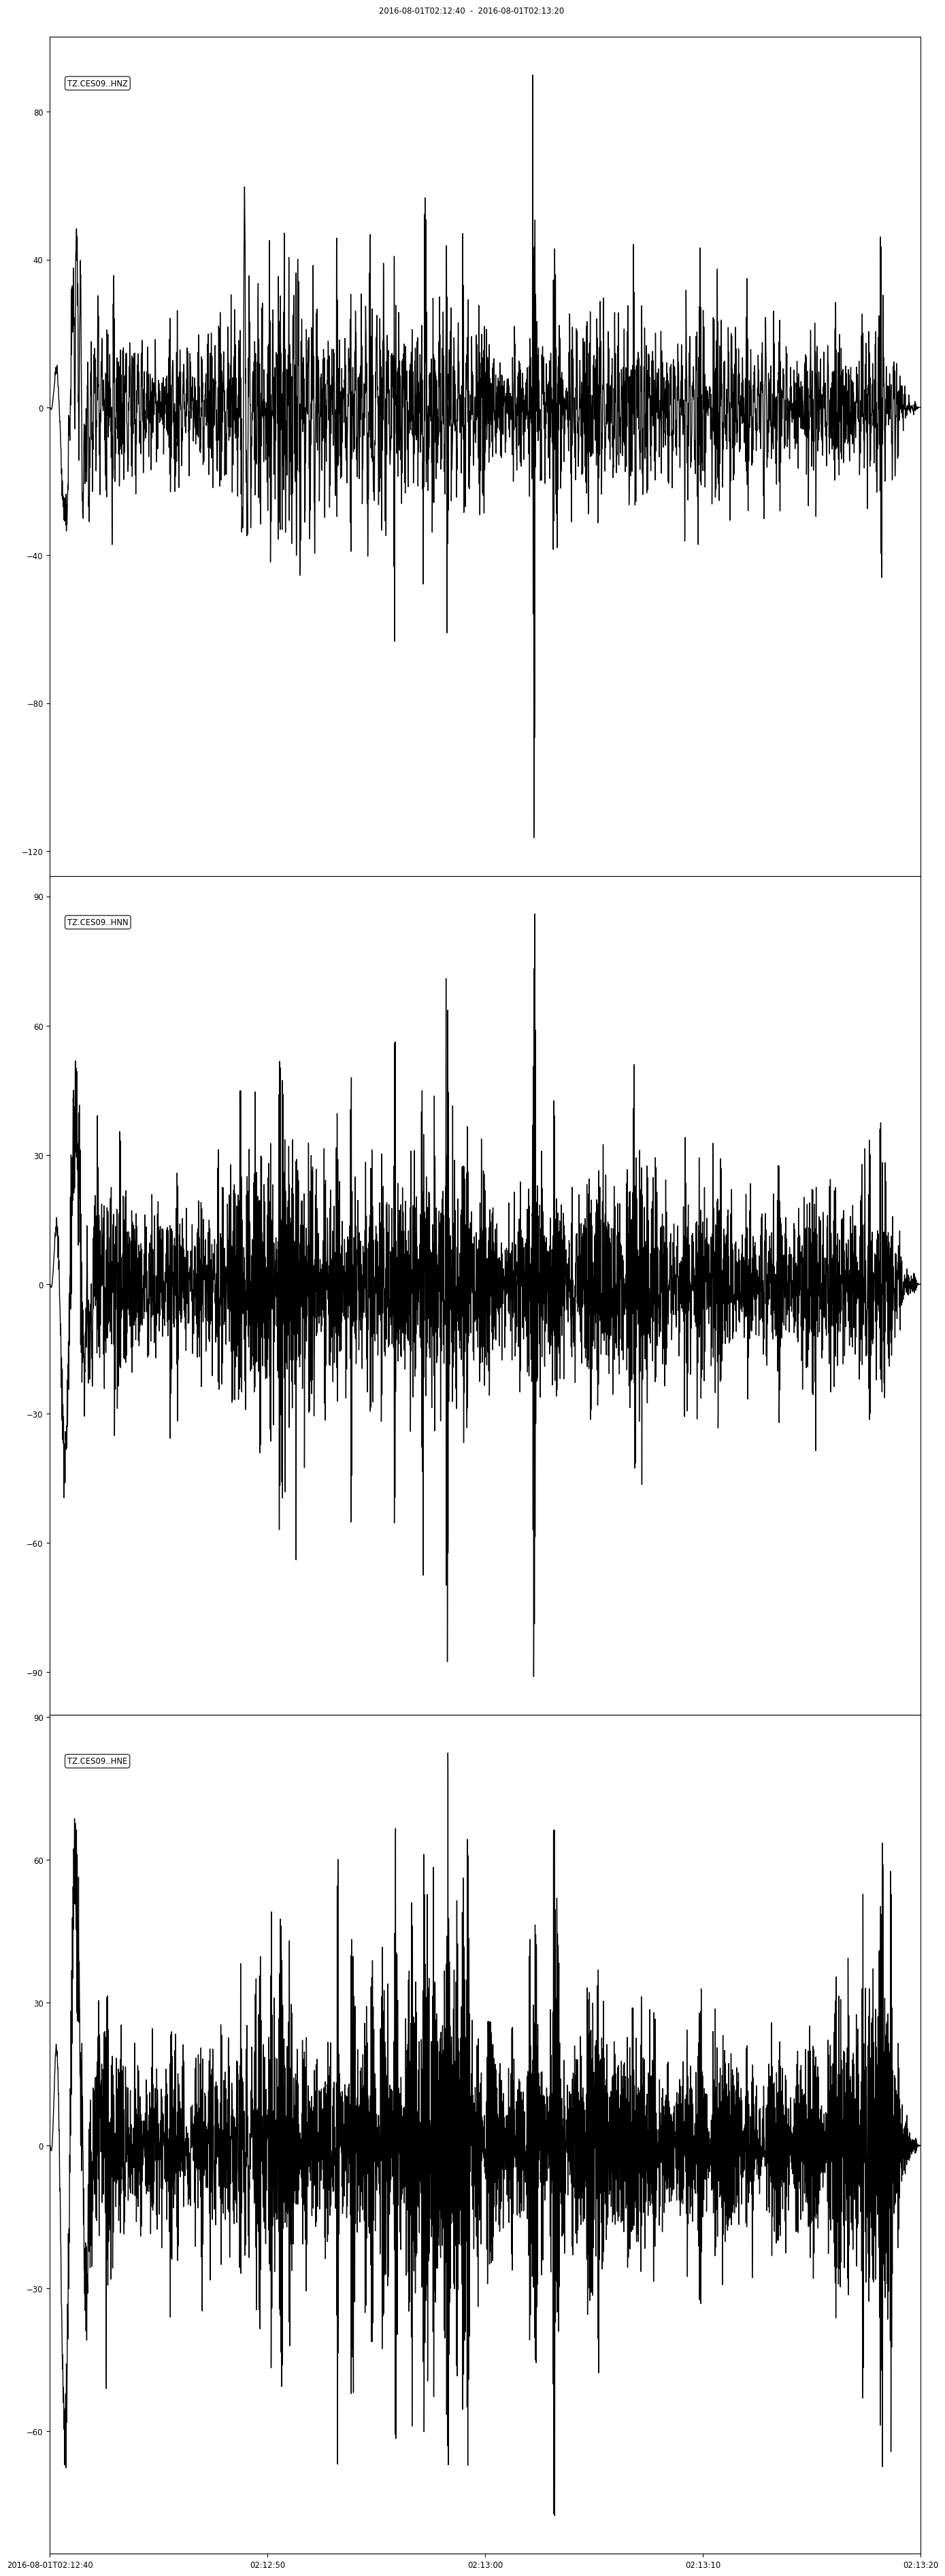

--------------------Next Event--------------------


In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import os


client = Client("http://10.254.145.79/")
time = overlapping_events[8][0][0]

for event_list in overlapping_events[7]:   # 8 stations recorded this event
    time = event_list[0]
    tz_st = client.get_waveforms("TZ", ",".join([event.station for station in event_list]), "", "HN*", UTCDateTime(time.start) - 15, UTCDateTime(time.end) + 15)
    tz_st.filter(type='bandpass', freqmin=1, freqmax=30).taper(max_percentage=.05).plot(equal_scale=False, size=(1400, 3800))
    
    print("-"*20 + "Next Event" + "-"*20)

In [70]:
for station1, station2 in overlapping_events[2]:
    print(station1.station, station2.station,station1.start)
    
    #tz_st = client.get_waveforms("TZ", "*", "", "HN*", UTCDateTime(station1.start) - 5, UTCDateTime(station1.end))
    #tz_st.filter(type='bandpass', freqmin=1, freqmax=90)
    #tz_st = tz_st.trim(starttime=UTCDateTime(station1.start) - 3, endtime=UTCDateTime(station1.end))
    #tz_st.plot(equal_scale=False, size=(1400, 2000))

CES08 CES09 2016-08-01T00:00:22.000000Z
CES07 CES09 2016-08-01T00:00:33.000000Z
CES08 CES09 2016-08-01T00:01:50.000000Z
CES04 CES09 2016-08-01T00:02:56.000000Z
CES04 CES09 2016-08-01T00:04:13.000000Z
CES01 CES02 2016-08-01T00:04:57.000000Z
CES04 CES08 2016-08-01T00:05:19.000000Z
CES02 CES09 2016-08-01T00:05:41.000000Z
CES05 CES08 2016-08-01T00:06:36.000000Z
CES04 CES09 2016-08-01T00:08:15.000000Z
CES01 CES07 2016-08-01T00:08:26.000000Z
CES04 CES09 2016-08-01T00:08:48.000000Z
CES03 CES06 2016-08-01T00:10:38.000000Z
CES02 CES09 2016-08-01T00:11:00.000000Z
CES07 CES08 2016-08-01T00:11:22.000000Z
CES01 CES09 2016-08-01T00:12:39.000000Z
CES02 CES09 2016-08-01T00:14:29.000000Z
CES06 CES08 2016-08-01T00:14:51.000000Z
CES06 CES09 2016-08-01T00:16:08.000000Z
CES02 CES09 2016-08-01T00:18:09.000000Z
CES07 CES08 2016-08-01T00:19:15.000000Z
CES01 CES04 2016-08-01T00:20:32.000000Z
CES02 CES06 2016-08-01T00:21:16.000000Z
CES08 CES09 2016-08-01T00:22:00.000000Z
CES02 CES08 2016-08-01T00:22:44.000000Z


CES03 CES07 2016-08-01T06:23:10.000000Z
CES04 CES09 2016-08-01T06:23:32.000000Z
CES08 CES09 2016-08-01T06:23:54.000000Z
CES07 CES08 2016-08-01T06:24:16.000000Z
CES07 CES09 2016-08-01T06:26:17.000000Z
CES04 CES05 2016-08-01T06:27:01.000000Z
CES07 CES09 2016-08-01T06:27:12.000000Z
CES03 CES07 2016-08-01T06:28:29.000000Z
CES04 CES07 2016-08-01T06:30:08.000000Z
CES07 CES09 2016-08-01T06:30:52.000000Z
CES01 CES09 2016-08-01T06:31:03.000000Z
CES03 CES09 2016-08-01T06:31:14.000000Z
CES02 CES09 2016-08-01T06:31:36.000000Z
CES03 CES09 2016-08-01T06:31:47.000000Z
CES05 CES07 2016-08-01T06:31:58.000000Z
CES01 CES05 2016-08-01T06:34:54.000000Z
CES05 CES09 2016-08-01T06:36:11.000000Z
CES05 CES09 2016-08-01T06:36:33.000000Z
CES06 CES07 2016-08-01T06:36:44.000000Z
CES07 CES09 2016-08-01T06:37:17.000000Z
CES04 CES09 2016-08-01T06:37:50.000000Z
CES07 CES08 2016-08-01T06:38:12.000000Z
CES08 CES09 2016-08-01T06:40:13.000000Z
CES05 CES08 2016-08-01T06:41:08.000000Z
CES05 CES09 2016-08-01T06:42:47.000000Z
